# 영화 리뷰 분류 : 이진 분류 예제

- IMDB 데이터셋
- 인터넷 영화 데이터베이스로 가져온 양극단의 리뷰 50000개
- Training data 25000개와 Test data 25000개로 나눠져 있음.
- 원 핫 인코딩을 사용해서 10000차원의 벡터로 변환해서 사용한다.
- 5만개의 샘플 데이터 중에서 자주 등장하는 단어 1만개로 추려낸다.
- MNIST처럼 Keras에 기본으로 포함되어 있음.
- 데이터는 전처리 되어 있어서 포함되어 있는 단어들이 모두 숫자로 변환되어 있음.

In [1]:
import numpy as np

import keras
keras.__version__

'2.8.0'

In [2]:
# 영화리뷰 데이터를 가져온다.
from keras.datasets import imdb

# ()만 하면 전체 데이터를 다 가져오는데, num_words=10000 을 쓰면 안에 있는 데이터 중 만개 추려서 가져오게 된다.
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [3]:
# train_data, test_data 둘 다 25000개로 준비되어 있다.

len(train_data)
len(test_data)

25000

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_label[0]

1

In [6]:
# 원래 단어들로 복원시켜주는 코드

# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다.
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
def vetorize_sequences (sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.0
    
    return results

In [9]:
vetorize_sequences(train_data).shape # 단어의 수인 25000 만큼 행과 10000개의 열이 생긴다.

(25000, 10000)

단어를 사용하는 것들은 단어를 numpy 배열로 만들고 벡터화 시키고 사용을 한다.

In [10]:
x_train = vetorize_sequences(train_data)
x_test = vetorize_sequences(test_data)

현재는 정수형 데이터이기 때문에 실수형 데이터로 바꾸고 사용해본다

In [11]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [12]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

뉴런의 개수는 어떻게 정할까?<br/>
예를들어 들어오는 데이터가 기본적으로 종류가 16개 정도로 커버할 수 있는 데이터라면, 뉴런의 개수를 계속해서 줄여갈 수는 있지만 줄였다가 늘리면 안된다. 정보의 손실이 발생한다.<br/>
0 또는 1을 나타내기 위해서는 1bit가 필요하다. 최종 결론에 이르기 위해서는 한개의 뉴런만 있으면 된다.<br/>
둘 중에 하나의 성과를 잘 내는 activation 함수가 있다. 값이 분명하게 결정되는 활성화 함수를 sigmoid 함수라고 한다.<br/>

작업하기 전에 신경망을 설계하는 과정이 필요하다.

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

# sigmoid -> binary_crossentropy / softmax -> categorical_crossentropy 를 사용한다.

In [24]:
x_val = x_train[:10000] # 앞에서부터 10000개 선택
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=3, batch_size=512, validation_data = (x_val, y_val)) # validation 검증작업까지 같이해서 시간이 좀 더 걸린다.

Epoch 1/3
30/30 [==============================] - 1s 14ms/step - loss: 0.4943 - accuracy: 0.7977 - val_loss: 0.3772 - val_accuracy: 0.8668
Epoch 2/3
30/30 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.9066 - val_loss: 0.2976 - val_accuracy: 0.8887
Epoch 3/3
30/30 [==============================] - 0s 7ms/step - loss: 0.2174 - accuracy: 0.9291 - val_loss: 0.2823 - val_accuracy: 0.8888


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
import matplotlib.pyplot as plt # 그림을 그리기 위한 라이브러리

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

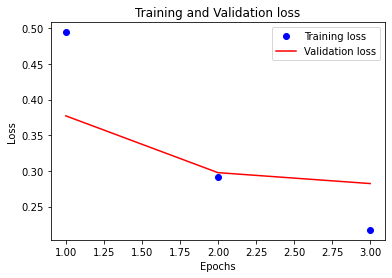

In [28]:
plt.plot(epochs, loss, 'bo', label = 'Training loss') # 학습손실
plt.plot(epochs, val_loss, 'r-', label = 'Validation loss') #검증손실
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

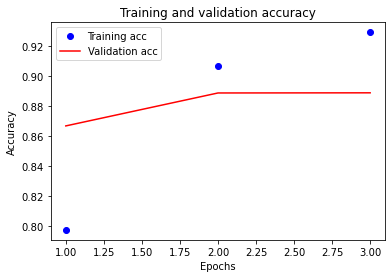

In [29]:
# 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

3번째가 꽤 괜찮은 구간인 것을 확인했다.<br/>
처음 epoch를 30으로 정하고 돌렸는데, 3번정도가 적당하다는 판단이 들었으니 3으로 수정하고 돌려본다.<br/>

In [32]:
results = model.evaluate(x_test, y_test) # 평가는 test 셋으로 해본다.

782/782 [==============================] - 1s 661us/step - loss: 0.3012 - accuracy: 0.8800


In [34]:
results
# 손실값, 정확도 를 리스트로 확인할 수 있다.

[0.3011948764324188, 0.8800399899482727]

In [40]:
# 예측을 해본다
# 1에 가까울 수록 positive, 0에 가까울 수록 negative

model.predict(x_test)

array([[0.2681312 ],
       [0.9979123 ],
       [0.8807066 ],
       ...,
       [0.11962855],
       [0.14150468],
       [0.5096069 ]], dtype=float32)